In [86]:
%matplotlib inline
import os, sys
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt


In [87]:
tf.reset_default_graph()
load_image = tf.image.decode_image(tf.read_file('fixtures/pyraminx.jpg'), channels=3)

fake_convmap = tf.image.resize_bicubic(
    tf.image.per_image_standardization(
        tf.expand_dims(load_image, 0)), [28, 28])

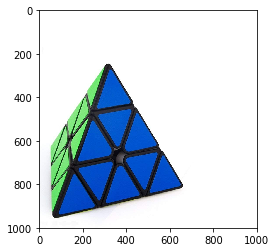

In [88]:
with tf.Session() as sess:
    im_test = sess.run(load_image)
    plt.imshow(im_test)

In [89]:
from skimage.segmentation import slic, mark_boundaries

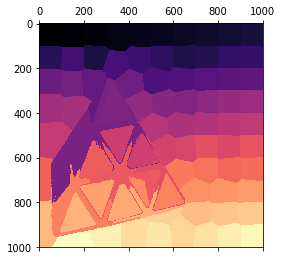

In [90]:
sp_test = slic(im_test)
plt.matshow(sp_test, cmap='magma')

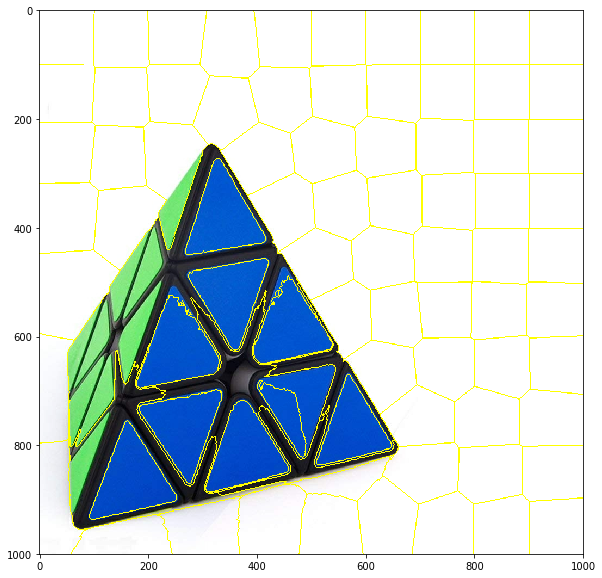

In [91]:
plt.figure(figsize=(10,10))
plt.imshow(mark_boundaries(im_test, sp_test))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(28, 28, 3) float32


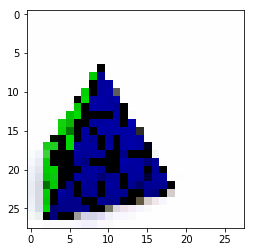

In [92]:
import skimage.exposure
with tf.Session() as sess:
    cm_test = np.squeeze(sess.run(fake_convmap))
    print(cm_test.shape, cm_test.dtype)
    plt.imshow(skimage.exposure.rescale_intensity(cm_test))